In [95]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import JaccardIndex


In [96]:
# Load our own modules
import sys

sys.path.append("../src")

from data import *

In [97]:
dataset = ValidationDataset("../Dataset_Student")
labeled = LabeledDataset("../Dataset_Student")
unlabeled = UnlabeledDataset("../Dataset_Student")

dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=2)

In [98]:
model = torch.load("../seg.pth", map_location=torch.device('cpu'))


tensor([[  4.2536,  -5.5657, -10.9471,  -5.9407,  -8.6415,  -4.7352,  -4.0627,
          -7.1151,  -5.7949,  -4.4598,  -4.7937,  -7.3855,  -5.9886,  -5.1648,
          -5.1297,  -8.5480,  -8.0006,  -3.1173,  -3.8235,  -2.1890,  -5.0958,
          -3.0573,  -3.1475,  -4.8609,  -2.3768,  -1.7806,  -4.1469,  -3.3350,
          -1.4196,  -2.9668,  -3.2284,  -3.2837,  -4.6519,  -5.0931,  -6.1292,
          -3.7296,  -6.4986,  -4.6530,  -6.2256,  -7.2787,  -5.9760,  -4.5440,
          -4.1297,  -4.8757,  -6.1213,  -5.1764,  -5.4845,  -4.9404,  -5.4793]])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
tensor(48)


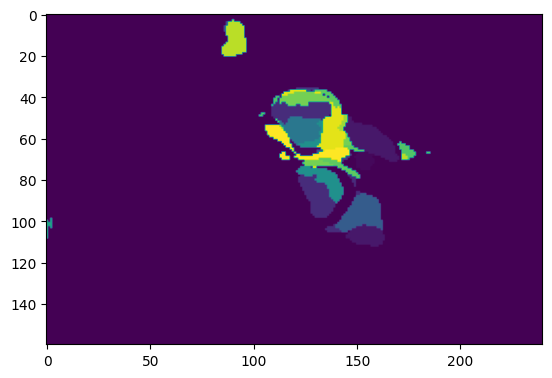

In [119]:
# First, get a mask and observe it
model.eval()

with torch.no_grad():
    x, label = labeled[45]
    x = x.unsqueeze(0)

    x = x[:, :11]
    # Transpose, since video resnet expects channels as first dim
    x = x.transpose(1, 2)
    output = model(x)
    
    print(output[:,:,0, 0])
    
    mask = torch.argmax(output, dim=1)
    print(mask)
    print(torch.max(mask))
    
plt.imshow(mask[0])


43


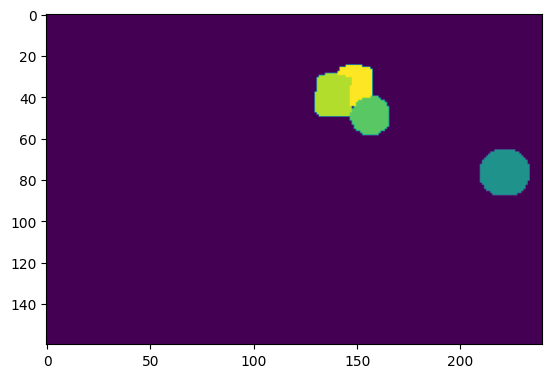

In [120]:

plt.imshow(label[21])
print(np.max(label[21]))


In [117]:
iou = JaccardIndex(task="multiclass", num_classes=49)

target = torch.tensor(label[21])
print(target.shape)
print(mask.shape)

print(iou(mask.squeeze(), target))


torch.Size([160, 240])
torch.Size([1, 160, 240])
tensor(0.0421)
